In [2]:
import os
from joblib import load
import numpy as np


user_dir = os.path.expanduser('~')
file_path = os.path.join(user_dir, 'iCloudDrive\Joblib BA\Hyperparam', 'randomctr220wRand_200sAll_30valid_2021.joblib')
loaded_vars_rndHyperparam = load(file_path)

s_selected_hyperparam_list, prediction_year = loaded_vars_rndHyperparam

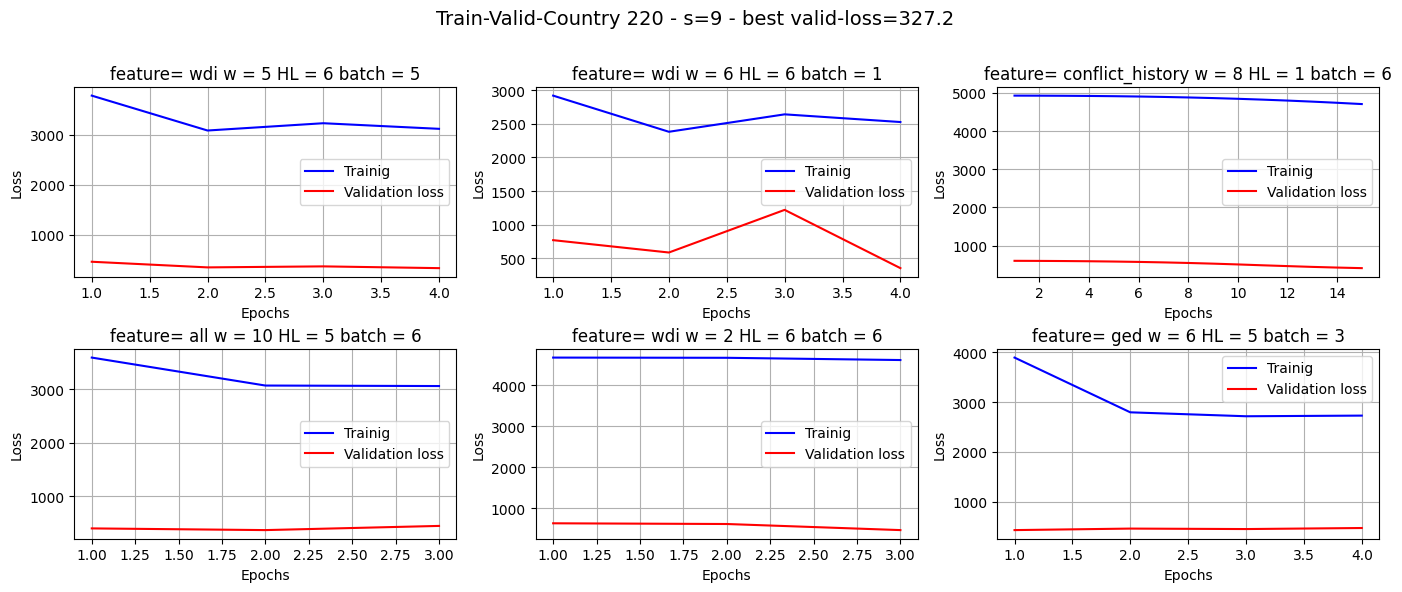

In [3]:
import numpy as np
import matplotlib.pyplot as plt

country_index = 0
country_to_plot = 220


# Erstelle eine Figur mit 1 Zeile und 3 Spalten für die beiden Plots nebeneinander und kleiner
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14, 6))



i = 0 #zeile
j = 0 #spalte

s=9
sorted_best_runs = s_selected_hyperparam_list[s-3]['hyperparams']

title_string = 'Train-Valid-Country ' + str(country_to_plot) + ' - s=' + str(s) + ' - best valid-loss=' + str(round(sorted_best_runs[0]['val_loss'][-1],1))

for k in range(0, 6):

    best_run = sorted_best_runs[k]

    loss = best_run['loss']
    val_loss = best_run['val_loss']
    epochs = best_run['epochs']
        
    axes[i][j].plot(epochs, loss, color='blue', label='Trainig')
    axes[i][j].plot(epochs, val_loss, color='red', label='Validation loss')
    axes[i][j].set_title('feature= ' + str(best_run['random_params']['featureSubset']) + ' w = ' + str(best_run['random_params']['w']) + ' HL = ' + str(best_run['random_params']['numbHiddenL']) + ' batch = ' + str(best_run['random_params']['batch_size']))
    axes[i][j].set_xlabel('Epochs')
    axes[i][j].set_ylabel('Loss')
    axes[i][j].legend()
    axes[i][j].grid(True)
    if j == 2:
        i += 1
        j = 0
    else:  
        j += 1

plt.tight_layout()  # Optimiere den Abstand zwischen den Subplots
plt.subplots_adjust(top=0.85)  # Mache Platz für den Haupttitel außerhalb des Plotbereichs
fig.suptitle(title_string, y=0.98, fontsize=14)
plt.show()

In [4]:
s_selected_hyperparam_list[s-3]['hyperparams'][0]['val_loss'][-1]

327.1806640625